# Stock purchase recommendations with Machine Learning

In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook # progress bar
import fastparquet

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

In [2]:
pd.set_option('display.max_columns', 1500)

## Machine Learning

In [3]:
# load the df_Xy dataframe from feature engineering step:
df_Xy = fastparquet.ParquetFile('../data/interim/df_Xy_all_tickers_final.parq').to_pandas()

# split df into features and target (column setup_for_profitable_trade)
df_X = df_Xy.drop(columns=['setup_for_profitable_trade'])
df_y = df_Xy['setup_for_profitable_trade']

df_X.shape

(2194, 687)

### Build Model

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, shuffle=False)

In [5]:
X_train.tail()

,AdjVolume_-19,AdjVolume_-18,AdjVolume_-17,AdjVolume_-16,AdjVolume_-15,AdjVolume_-14,AdjVolume_-13,AdjVolume_-12,AdjVolume_-11,AdjVolume_-10,AdjVolume_-9,AdjVolume_-8,AdjVolume_-7,AdjVolume_-6,AdjVolume_-5,AdjVolume_-4,AdjVolume_-3,AdjVolume_-2,AdjVolume_-1,AdjVolume_0,AdjOpen_-19,AdjOpen_-18,AdjOpen_-17,AdjOpen_-16,AdjOpen_-15,AdjOpen_-14,AdjOpen_-13,AdjOpen_-12,AdjOpen_-11,AdjOpen_-10,AdjOpen_-9,AdjOpen_-8,AdjOpen_-7,AdjOpen_-6,AdjOpen_-5,AdjOpen_-4,AdjOpen_-3,AdjOpen_-2,AdjOpen_-1,AdjOpen_0,AdjHigh_-19,AdjHigh_-18,AdjHigh_-17,AdjHigh_-16,AdjHigh_-15,AdjHigh_-14,AdjHigh_-13,AdjHigh_-12,AdjHigh_-11,AdjHigh_-10,AdjHigh_-9,AdjHigh_-8,AdjHigh_-7,AdjHigh_-6,AdjHigh_-5,AdjHigh_-4,AdjHigh_-3,AdjHigh_-2,AdjHigh_-1,AdjHigh_0,AdjLow_-19,AdjLow_-18,AdjLow_-17,AdjLow_-16,AdjLow_-15,AdjLow_-14,AdjLow_-13,AdjLow_-12,AdjLow_-11,AdjLow_-10,AdjLow_-9,AdjLow_-8,AdjLow_-7,AdjLow_-6,AdjLow_-5,AdjLow_-4,AdjLow_-3,AdjLow_-2,AdjLow_-1,AdjLow_0,AdjClose_-19,AdjClose_-18,AdjClose_-17,AdjClose_-16,AdjClose_-15,AdjClose_-14,AdjClose_-13,AdjClose_-12,AdjClose_-11,AdjClose_-10,AdjClose_-9,AdjClose_-8,AdjClose_-7,AdjClose_-6,AdjClose_-5,AdjClose_-4,AdjClose_-3,AdjClose_-2,AdjClose_-1,AdjClose_0,AdjCloseRSI14_-19,AdjCloseRSI14_-18,AdjCloseRSI14_-17,AdjCloseRSI14_-16,AdjCloseRSI14_-15,AdjCloseRSI14_-14,AdjCloseRSI14_-13,AdjCloseRSI14_-12,AdjCloseRSI14_-11,AdjCloseRSI14_-10,AdjCloseRSI14_-9,AdjCloseRSI14_-8,AdjCloseRSI14_-7,AdjCloseRSI14_-6,AdjCloseRSI14_-5,AdjCloseRSI14_-4,AdjCloseRSI14_-3,AdjCloseRSI14_-2,AdjCloseRSI14_-1,AdjCloseRSI14_0,RSI_above_80_-19,RSI_above_80_-18,RSI_above_80_-17,RSI_above_80_-16,RSI_above_80_-15,RSI_above_80_-14,RSI_above_80_-13,RSI_above_80_-12,RSI_above_80_-11,RSI_above_80_-10,RSI_above_80_-9,RSI_above_80_-8,RSI_above_80_-7,RSI_above_80_-6,RSI_above_80_-5,RSI_above_80_-4,RSI_above_80_-3,RSI_above_80_-2,RSI_above_80_-1,RSI_above_80_0,RSI_below_20_-19,RSI_below_20_-18,RSI_below_20_-17,RSI_below_20_-16,RSI_below_20_-15,RSI_below_20_-14,RSI_below_20_-13,RSI_below_20_-12,RSI_below_20_-11,RSI_below_20_-10,RSI_below_20_-9,RSI_below_20_-8,RSI_below_20_-7,RSI_below_20_-6,RSI_below_20_-5,RSI_below_20_-4,RSI_below_20_-3,RSI_below_20_-2,RSI_below_20_-1,RSI_below_20_0,AdjCloseSMA10_-19,AdjCloseSMA10_-18,AdjCloseSMA10_-17,AdjCloseSMA10_-16,AdjCloseSMA10_-15,AdjCloseSMA10_-14,AdjCloseSMA10_-13,AdjCloseSMA10_-12,AdjCloseSMA10_-11,AdjCloseSMA10_-10,AdjCloseSMA10_-9,AdjCloseSMA10_-8,AdjCloseSMA10_-7,AdjCloseSMA10_-6,AdjCloseSMA10_-5,AdjCloseSMA10_-4,AdjCloseSMA10_-3,AdjCloseSMA10_-2,AdjCloseSMA10_-1,AdjCloseSMA10_0,AdjCloseSMA10_to_AdjClose_ratio_-19,AdjCloseSMA10_to_AdjClose_ratio_-18,AdjCloseSMA10_to_AdjClose_ratio_-17,AdjCloseSMA10_to_AdjClose_ratio_-16,AdjCloseSMA10_to_AdjClose_ratio_-15,AdjCloseSMA10_to_AdjClose_ratio_-14,AdjCloseSMA10_to_AdjClose_ratio_-13,AdjCloseSMA10_to_AdjClose_ratio_-12,AdjCloseSMA10_to_AdjClose_ratio_-11,AdjCloseSMA10_to_AdjClose_ratio_-10,AdjCloseSMA10_to_AdjClose_ratio_-9,AdjCloseSMA10_to_AdjClose_ratio_-8,AdjCloseSMA10_to_AdjClose_ratio_-7,AdjCloseSMA10_to_AdjClose_ratio_-6,AdjCloseSMA10_to_AdjClose_ratio_-5,AdjCloseSMA10_to_AdjClose_ratio_-4,AdjCloseSMA10_to_AdjClose_ratio_-3,AdjCloseSMA10_to_AdjClose_ratio_-2,AdjCloseSMA10_to_AdjClose_ratio_-1,AdjCloseSMA10_to_AdjClose_ratio_0,AdjClose_above_AdjCloseSMA10_-19,AdjClose_above_AdjCloseSMA10_-18,AdjClose_above_AdjCloseSMA10_-17,AdjClose_above_AdjCloseSMA10_-16,AdjClose_above_AdjCloseSMA10_-15,AdjClose_above_AdjCloseSMA10_-14,AdjClose_above_AdjCloseSMA10_-13,AdjClose_above_AdjCloseSMA10_-12,AdjClose_above_AdjCloseSMA10_-11,AdjClose_above_AdjCloseSMA10_-10,AdjClose_above_AdjCloseSMA10_-9,AdjClose_above_AdjCloseSMA10_-8,AdjClose_above_AdjCloseSMA10_-7,AdjClose_above_AdjCloseSMA10_-6,AdjClose_above_AdjCloseSMA10_-5,AdjClose_above_AdjCloseSMA10_-4,AdjClose_above_AdjCloseSMA10_-3,AdjClose_above_AdjCloseSMA10_-2,AdjClose_above_AdjCloseSMA10_-1,AdjClose_above_AdjCloseSMA10_0,AdjClose_crossed_AdjCloseSMA10_-19,AdjClose_crossed_AdjCloseSMA10_-18,AdjClose_crossed_AdjCloseSMA10

In [6]:
X_test.head()

,AdjVolume_-19,AdjVolume_-18,AdjVolume_-17,AdjVolume_-16,AdjVolume_-15,AdjVolume_-14,AdjVolume_-13,AdjVolume_-12,AdjVolume_-11,AdjVolume_-10,AdjVolume_-9,AdjVolume_-8,AdjVolume_-7,AdjVolume_-6,AdjVolume_-5,AdjVolume_-4,AdjVolume_-3,AdjVolume_-2,AdjVolume_-1,AdjVolume_0,AdjOpen_-19,AdjOpen_-18,AdjOpen_-17,AdjOpen_-16,AdjOpen_-15,AdjOpen_-14,AdjOpen_-13,AdjOpen_-12,AdjOpen_-11,AdjOpen_-10,AdjOpen_-9,AdjOpen_-8,AdjOpen_-7,AdjOpen_-6,AdjOpen_-5,AdjOpen_-4,AdjOpen_-3,AdjOpen_-2,AdjOpen_-1,AdjOpen_0,AdjHigh_-19,AdjHigh_-18,AdjHigh_-17,AdjHigh_-16,AdjHigh_-15,AdjHigh_-14,AdjHigh_-13,AdjHigh_-12,AdjHigh_-11,AdjHigh_-10,AdjHigh_-9,AdjHigh_-8,AdjHigh_-7,AdjHigh_-6,AdjHigh_-5,AdjHigh_-4,AdjHigh_-3,AdjHigh_-2,AdjHigh_-1,AdjHigh_0,AdjLow_-19,AdjLow_-18,AdjLow_-17,AdjLow_-16,AdjLow_-15,AdjLow_-14,AdjLow_-13,AdjLow_-12,AdjLow_-11,AdjLow_-10,AdjLow_-9,AdjLow_-8,AdjLow_-7,AdjLow_-6,AdjLow_-5,AdjLow_-4,AdjLow_-3,AdjLow_-2,AdjLow_-1,AdjLow_0,AdjClose_-19,AdjClose_-18,AdjClose_-17,AdjClose_-16,AdjClose_-15,AdjClose_-14,AdjClose_-13,AdjClose_-12,AdjClose_-11,AdjClose_-10,AdjClose_-9,AdjClose_-8,AdjClose_-7,AdjClose_-6,AdjClose_-5,AdjClose_-4,AdjClose_-3,AdjClose_-2,AdjClose_-1,AdjClose_0,AdjCloseRSI14_-19,AdjCloseRSI14_-18,AdjCloseRSI14_-17,AdjCloseRSI14_-16,AdjCloseRSI14_-15,AdjCloseRSI14_-14,AdjCloseRSI14_-13,AdjCloseRSI14_-12,AdjCloseRSI14_-11,AdjCloseRSI14_-10,AdjCloseRSI14_-9,AdjCloseRSI14_-8,AdjCloseRSI14_-7,AdjCloseRSI14_-6,AdjCloseRSI14_-5,AdjCloseRSI14_-4,AdjCloseRSI14_-3,AdjCloseRSI14_-2,AdjCloseRSI14_-1,AdjCloseRSI14_0,RSI_above_80_-19,RSI_above_80_-18,RSI_above_80_-17,RSI_above_80_-16,RSI_above_80_-15,RSI_above_80_-14,RSI_above_80_-13,RSI_above_80_-12,RSI_above_80_-11,RSI_above_80_-10,RSI_above_80_-9,RSI_above_80_-8,RSI_above_80_-7,RSI_above_80_-6,RSI_above_80_-5,RSI_above_80_-4,RSI_above_80_-3,RSI_above_80_-2,RSI_above_80_-1,RSI_above_80_0,RSI_below_20_-19,RSI_below_20_-18,RSI_below_20_-17,RSI_below_20_-16,RSI_below_20_-15,RSI_below_20_-14,RSI_below_20_-13,RSI_below_20_-12,RSI_below_20_-11,RSI_below_20_-10,RSI_below_20_-9,RSI_below_20_-8,RSI_below_20_-7,RSI_below_20_-6,RSI_below_20_-5,RSI_below_20_-4,RSI_below_20_-3,RSI_below_20_-2,RSI_below_20_-1,RSI_below_20_0,AdjCloseSMA10_-19,AdjCloseSMA10_-18,AdjCloseSMA10_-17,AdjCloseSMA10_-16,AdjCloseSMA10_-15,AdjCloseSMA10_-14,AdjCloseSMA10_-13,AdjCloseSMA10_-12,AdjCloseSMA10_-11,AdjCloseSMA10_-10,AdjCloseSMA10_-9,AdjCloseSMA10_-8,AdjCloseSMA10_-7,AdjCloseSMA10_-6,AdjCloseSMA10_-5,AdjCloseSMA10_-4,AdjCloseSMA10_-3,AdjCloseSMA10_-2,AdjCloseSMA10_-1,AdjCloseSMA10_0,AdjCloseSMA10_to_AdjClose_ratio_-19,AdjCloseSMA10_to_AdjClose_ratio_-18,AdjCloseSMA10_to_AdjClose_ratio_-17,AdjCloseSMA10_to_AdjClose_ratio_-16,AdjCloseSMA10_to_AdjClose_ratio_-15,AdjCloseSMA10_to_AdjClose_ratio_-14,AdjCloseSMA10_to_AdjClose_ratio_-13,AdjCloseSMA10_to_AdjClose_ratio_-12,AdjCloseSMA10_to_AdjClose_ratio_-11,AdjCloseSMA10_to_AdjClose_ratio_-10,AdjCloseSMA10_to_AdjClose_ratio_-9,AdjCloseSMA10_to_AdjClose_ratio_-8,AdjCloseSMA10_to_AdjClose_ratio_-7,AdjCloseSMA10_to_AdjClose_ratio_-6,AdjCloseSMA10_to_AdjClose_ratio_-5,AdjCloseSMA10_to_AdjClose_ratio_-4,AdjCloseSMA10_to_AdjClose_ratio_-3,AdjCloseSMA10_to_AdjClose_ratio_-2,AdjCloseSMA10_to_AdjClose_ratio_-1,AdjCloseSMA10_to_AdjClose_ratio_0,AdjClose_above_AdjCloseSMA10_-19,AdjClose_above_AdjCloseSMA10_-18,AdjClose_above_AdjCloseSMA10_-17,AdjClose_above_AdjCloseSMA10_-16,AdjClose_above_AdjCloseSMA10_-15,AdjClose_above_AdjCloseSMA10_-14,AdjClose_above_AdjCloseSMA10_-13,AdjClose_above_AdjCloseSMA10_-12,AdjClose_above_AdjCloseSMA10_-11,AdjClose_above_AdjCloseSMA10_-10,AdjClose_above_AdjCloseSMA10_-9,AdjClose_above_AdjCloseSMA10_-8,AdjClose_above_AdjCloseSMA10_-7,AdjClose_above_AdjCloseSMA10_-6,AdjClose_above_AdjCloseSMA10_-5,AdjClose_above_AdjCloseSMA10_-4,AdjClose_above_AdjCloseSMA10_-3,AdjClose_above_AdjCloseSMA10_-2,AdjClose_above_AdjCloseSMA10_-1,AdjClose_above_AdjCloseSMA10_0,AdjClose_crossed_AdjCloseSMA10_-19,AdjClose_crossed_AdjCloseSMA10_-18,AdjClose_crossed_AdjCloseSMA10

In [7]:
pipeline = Pipeline([
    ('standardScaler', StandardScaler()),
    ('randomForest', RandomForestClassifier())
])
pipeline.get_params()

{'memory': None,
 'randomForest': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'randomForest__bootstrap': True,
 'randomForest__class_weight': None,
 'randomForest__criterion': 'gini',
 'randomForest__max_depth': None,
 'randomForest__max_features': 'auto',
 'randomForest__max_leaf_nodes': None,
 'randomForest__min_impurity_decrease': 0.0,
 'randomForest__min_impurity_split': None,
 'randomForest__min_samples_leaf': 1,
 'randomForest__min_samples_split': 2,
 'randomForest__min_weight_fraction_leaf': 0.0,
 'randomForest__n_estimators': 'warn',
 'randomForest__n_jobs': None,
 'randomForest__oob_score': F

In [8]:
pipeline.fit(X_train, y_train)

C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('standardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomForest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [9]:
y_pred = pipeline.predict(X_test)

C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.70      0.89      0.78       294
        True       0.49      0.22      0.30       145

   micro avg       0.67      0.67      0.67       439
   macro avg       0.60      0.55      0.54       439
weighted avg       0.63      0.67      0.62       439



In [11]:
accuracy_score(y_test, y_pred)

0.6674259681093394

In [12]:
confusion_matrix(y_test, y_pred, labels=[False, True])

array([[261,  33],
       [113,  32]], dtype=int64)

In [13]:
def print_feature_importances(estimator):

    importances = estimator.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X_train.shape[1]):
        print(str(f + 1) + " importance: " + str(importances[indices[f]]) + ". feature name: " + X_train.columns[indices[f]])
        
print_feature_importances(pipeline.named_steps['randomForest'])

Feature ranking:
1 importance: 0.011769861587259605. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_-1
2 importance: 0.008730394106895738. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_0
3 importance: 0.008329637269481821. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_-10
4 importance: 0.008160750101881324. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_-13
5 importance: 0.008008760529416044. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_-5
6 importance: 0.007961292452377176. feature name: AdjCloseSMA50_-14
7 importance: 0.007928224472583702. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_-6
8 importance: 0.007514548715342686. feature name: AdjCloseSMA50_-16
9 importance: 0.007434088429073919. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_-4
10 importance: 0.007426459075057938. feature name: AdjCloseSMA10_to_AdjCloseSMA50_ratio_-10
11 importance: 0.007192202197966983. feature name: AdjCloseSMA200_to_AdjClose_ratio_-10
12 importance: 0.007146493920

105 importance: 0.0030793409381898976. feature name: AdjHigh_-11
106 importance: 0.003049924135019648. feature name: AdjCloseSMA50_-9
107 importance: 0.0030463780013214137. feature name: AdjHigh_chg_-5
108 importance: 0.0030341996432821094. feature name: AdjCloseSMA200_to_AdjClose_ratio_-2
109 importance: 0.0030298940548424886. feature name: AdjVolume_-19
110 importance: 0.0030240249453607725. feature name: AdjCloseSMA200_-1
111 importance: 0.002992534504045216. feature name: AdjOpen_-18
112 importance: 0.002931692185479616. feature name: AdjCloseSMA50_chg_-15
113 importance: 0.002918499628963399. feature name: AdjCloseSMA200_chg_0
114 importance: 0.0028785510268278204. feature name: AdjCloseSMA50_to_AdjClose_ratio_-11
115 importance: 0.00287771502307214. feature name: AdjCloseSMA10_chg_-15
116 importance: 0.0028751992104581437. feature name: AdjLow_chg_-5
117 importance: 0.0028699149199071026. feature name: AdjCloseSMA50_to_AdjClose_ratio_-12
118 importance: 0.0028674015609784663. fea

215 importance: 0.0018623353774331966. feature name: AdjVolume_-15
216 importance: 0.0018574111983427088. feature name: AdjOpen_chg_-1
217 importance: 0.0018480360953534746. feature name: AdjCloseSMA50_chg_-6
218 importance: 0.0018467330922229748. feature name: AdjCloseSMA200_chg_-14
219 importance: 0.0018447586814649055. feature name: AdjVolume_-6
220 importance: 0.0018439866852969031. feature name: AdjOpen_-1
221 importance: 0.0018338902963633784. feature name: AdjCloseSMA10_to_AdjClose_ratio_-3
222 importance: 0.001828523478962662. feature name: AdjOpen_-17
223 importance: 0.0018139125948938056. feature name: AdjOpen_-2
224 importance: 0.0018104926505942173. feature name: AdjCloseSMA50_chg_-19
225 importance: 0.0018041053021588937. feature name: AdjOpen_chg_-19
226 importance: 0.0018028090536927506. feature name: AdjClose_chg_-6
227 importance: 0.0017899180385336402. feature name: AdjHigh_-5
228 importance: 0.0017884824265891781. feature name: AdjOpen_chg_-17
229 importance: 0.00178

330 importance: 0.0009550110073152738. feature name: AdjOpen_chg_-3
331 importance: 0.0009337330024330023. feature name: AdjCloseSMA200_above_AdjCloseSMA50_-6
332 importance: 0.0009299648525165323. feature name: AdjClose_-16
333 importance: 0.0009278118652634602. feature name: RSI_above_80_0
334 importance: 0.000925388889763706. feature name: AdjVolume_chg_-6
335 importance: 0.0009215132925947187. feature name: AdjCloseSMA10_to_AdjClose_ratio_-12
336 importance: 0.000912555408387266. feature name: AdjVolume_chg_-11
337 importance: 0.0009042388080979403. feature name: AdjClose_chg_-8
338 importance: 0.000903399562793474. feature name: AdjLow_chg_-6
339 importance: 0.000897691270021383. feature name: AdjCloseSMA10_-16
340 importance: 0.0008689714537534557. feature name: AdjVolume_chg_-16
341 importance: 0.000864338006117458. feature name: AdjCloseSMA50_to_AdjClose_ratio_-4
342 importance: 0.0008616514505569965. feature name: AdjHigh_-6
343 importance: 0.0008520713006102216. feature name:

440 importance: 0.00020692704495210018. feature name: AdjClose_above_AdjCloseSMA10_-14
441 importance: 0.00020636104853371439. feature name: AdjHigh_chg_-1
442 importance: 0.00019899884493737867. feature name: AdjClose_above_AdjCloseSMA50_-17
443 importance: 0.00019744421310324551. feature name: AdjCloseSMA200_above_AdjCloseSMA50_-10
444 importance: 0.00019706524375454767. feature name: AdjOpen_chg_-10
445 importance: 0.00019469310597813226. feature name: AdjCloseSMA50_chg_0
446 importance: 0.00019399410464259397. feature name: AdjHigh_chg_-18
447 importance: 0.00017933558558558553. feature name: AdjCloseSMA200_to_AdjClose_ratio_-13
448 importance: 0.00017567567567567568. feature name: AdjCloseSMA50_to_AdjClose_ratio_-10
449 importance: 0.00017516910555959788. feature name: AdjClose_above_AdjCloseSMA10_-15
450 importance: 0.00013161125750397524. feature name: AdjClose_chg_0
451 importance: 0.00013137682916969842. feature name: AdjClose_crossed_AdjCloseSMA10_-11
452 importance: 0.000128

564 importance: 0.0. feature name: AdjCloseSMA50_crossed_AdjCloseSMA10_-14
565 importance: 0.0. feature name: AdjCloseSMA50_crossed_AdjCloseSMA10_-12
566 importance: 0.0. feature name: AdjCloseSMA50_crossed_AdjCloseSMA10_-11
567 importance: 0.0. feature name: AdjCloseSMA50_crossed_AdjCloseSMA10_-10
568 importance: 0.0. feature name: AdjCloseSMA50_crossed_AdjCloseSMA10_-7
569 importance: 0.0. feature name: AdjCloseSMA50_above_AdjCloseSMA10_-2
570 importance: 0.0. feature name: AdjCloseSMA50_crossed_AdjCloseSMA10_-6
571 importance: 0.0. feature name: AdjCloseSMA50_crossed_AdjCloseSMA10_-5
572 importance: 0.0. feature name: AdjCloseSMA50_crossed_AdjCloseSMA10_-3
573 importance: 0.0. feature name: AdjCloseSMA50_crossed_AdjCloseSMA10_-2
574 importance: 0.0. feature name: AdjCloseSMA50_crossed_AdjCloseSMA10_-1
575 importance: 0.0. feature name: AdjCloseSMA50_crossed_AdjCloseSMA10_0
576 importance: 0.0. feature name: AdjVolume_chg_-14
577 importance: 0.0. feature name: AdjLow_chg_-15
578 impo

682 importance: 0.0. feature name: AdjClose_crossed_AdjCloseSMA50_-6
683 importance: 0.0. feature name: AdjClose_crossed_AdjCloseSMA50_-5
684 importance: 0.0. feature name: AdjClose_crossed_AdjCloseSMA50_-4
685 importance: 0.0. feature name: AdjClose_crossed_AdjCloseSMA50_-2
686 importance: 0.0. feature name: AdjCloseSMA200_-14
687 importance: 0.0. feature name: INTC.US


### Improve RandomForest model

In [14]:
parameters = {
    'randomForest__min_samples_leaf': [1, 2, 5, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring='f1', n_jobs=-1, verbose=6)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:   25.3s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.9s finished
C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomForest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'randomForest__min_samples_leaf': [1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=6)

In [15]:
cv.best_params_

{'randomForest__min_samples_leaf': 2}

In [16]:
print_feature_importances(cv.best_estimator_.named_steps['randomForest'])

Feature ranking:
1 importance: 0.015733950059622442. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_-15
2 importance: 0.013367316853432237. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_-12
3 importance: 0.012469472187904332. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_-7
4 importance: 0.010884168692891853. feature name: AdjCloseSMA50_-17
5 importance: 0.010431732892412122. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_-8
6 importance: 0.010398375510034513. feature name: AdjCloseSMA200_to_AdjClose_ratio_-8
7 importance: 0.009530237039254116. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_0
8 importance: 0.009393990244744556. feature name: AdjCloseSMA50_-14
9 importance: 0.009278296063268177. feature name: AdjCloseSMA200_to_AdjClose_ratio_-7
10 importance: 0.008432726783113045. feature name: AdjCloseSMA200_-15
11 importance: 0.008192334512802879. feature name: AdjCloseSMA10_-19
12 importance: 0.008098108415609895. feature name: week
13 importance: 0.0077919

107 importance: 0.0030298054834746206. feature name: AdjHigh_-10
108 importance: 0.003027904415288272. feature name: AdjCloseSMA50_chg_-7
109 importance: 0.003006572665862817. feature name: AdjCloseSMA10_-2
110 importance: 0.0029880297898171424. feature name: AdjCloseSMA200_to_AdjClose_ratio_-18
111 importance: 0.0029862136311417913. feature name: AdjCloseSMA200_-3
112 importance: 0.0029354346833871526. feature name: day
113 importance: 0.002906588640542734. feature name: AdjLow_chg_-7
114 importance: 0.002902839328084818. feature name: AdjCloseSMA10_-3
115 importance: 0.002895595633935831. feature name: AdjCloseSMA10_chg_-11
116 importance: 0.0028481967245332328. feature name: AdjVolume_chg_-14
117 importance: 0.002819058164087748. feature name: RSI_above_80_0
118 importance: 0.0028114467667011275. feature name: AdjCloseSMA50_to_AdjCloseSMA200_ratio_-4
119 importance: 0.0028092892582128157. feature name: AdjClose_chg_-7
120 importance: 0.0028001114817288847. feature name: AdjCloseSMA2

219 importance: 0.001678942782509325. feature name: AdjVolume_-2
220 importance: 0.0016622523028232885. feature name: AdjCloseSMA50_chg_-11
221 importance: 0.0016453673598562433. feature name: AdjCloseSMA10_to_AdjClose_ratio_-13
222 importance: 0.0016252303040254514. feature name: AdjCloseSMA50_-3
223 importance: 0.0016116340363063046. feature name: AdjCloseSMA10_to_AdjCloseSMA50_ratio_-6
224 importance: 0.0015991394205192282. feature name: AdjLow_-2
225 importance: 0.0015951636483931598. feature name: AdjCloseSMA10_-4
226 importance: 0.0015917675058893118. feature name: AdjCloseSMA50_chg_-19
227 importance: 0.0015913145121740548. feature name: AdjCloseRSI14_-11
228 importance: 0.0015743189809617672. feature name: AdjCloseSMA50_to_AdjClose_ratio_-9
229 importance: 0.0015690189049567507. feature name: AdjCloseSMA50_-4
230 importance: 0.0015662650893151337. feature name: AdjOpen_-19
231 importance: 0.00154926480661133. feature name: AdjCloseSMA200_chg_-11
232 importance: 0.00154624581469

331 importance: 0.0008687796330169239. feature name: AdjHigh_chg_0
332 importance: 0.0008601685030037185. feature name: AdjLow_chg_-12
333 importance: 0.0008564645716377384. feature name: AdjHigh_chg_-4
334 importance: 0.000844922450136607. feature name: AdjLow_-7
335 importance: 0.000841344162747799. feature name: AdjLow_chg_-2
336 importance: 0.0008409036363438415. feature name: AdjCloseSMA50_to_AdjClose_ratio_-4
337 importance: 0.0008375384431269521. feature name: AdjCloseSMA200_chg_-15
338 importance: 0.0008195700514045372. feature name: AdjCloseSMA200_chg_-14
339 importance: 0.0008053094292092674. feature name: AdjCloseSMA10_to_AdjClose_ratio_-5
340 importance: 0.0008034266512960912. feature name: AdjHigh_chg_-5
341 importance: 0.0007876070351725466. feature name: AdjCloseSMA50_to_AdjClose_ratio_-7
342 importance: 0.0007800711264624308. feature name: AdjOpen_chg_-6
343 importance: 0.0007730544189487245. feature name: AdjClose_above_AdjCloseSMA10_-8
344 importance: 0.00077275917370

440 importance: 9.95057879199974e-05. feature name: AdjCloseSMA10_to_AdjClose_ratio_-14
441 importance: 9.921694930777102e-05. feature name: AdjClose_chg_-4
442 importance: 9.921694930777102e-05. feature name: AdjOpen_chg_-2
443 importance: 9.260248602058624e-05. feature name: AdjCloseSMA10_to_AdjClose_ratio_-15
444 importance: 9.237824231839384e-05. feature name: AdjLow_chg_-17
445 importance: 9.237824231839384e-05. feature name: AdjOpen_-7
446 importance: 9.237824231839384e-05. feature name: AdjCloseSMA200_above_AdjCloseSMA50_-10
447 importance: 9.18112956143235e-05. feature name: AdjClose_-18
448 importance: 8.381127182013125e-05. feature name: AdjCloseSMA50_above_AdjCloseSMA10_-1
449 importance: 8.074093609466324e-05. feature name: AdjCloseSMA200_-7
450 importance: 6.965405154399814e-05. feature name: AdjClose_crossed_AdjCloseSMA10_-6
451 importance: 6.928368173879537e-05. feature name: AdjClose_crossed_AdjCloseSMA10_-3
452 importance: 3.950687787139337e-05. feature name: AdjCloseS

557 importance: 0.0. feature name: AdjCloseSMA200_crossed_AdjCloseSMA50_-5
558 importance: 0.0. feature name: AdjCloseSMA200_crossed_AdjCloseSMA50_-6
559 importance: 0.0. feature name: AdjOpen_0
560 importance: 0.0. feature name: AdjCloseSMA200_crossed_AdjCloseSMA50_-7
561 importance: 0.0. feature name: AdjCloseSMA200_crossed_AdjCloseSMA50_-8
562 importance: 0.0. feature name: AdjCloseSMA200_crossed_AdjCloseSMA50_-9
563 importance: 0.0. feature name: AdjCloseSMA200_crossed_AdjCloseSMA50_-10
564 importance: 0.0. feature name: RSI_above_80_-19
565 importance: 0.0. feature name: RSI_above_80_-13
566 importance: 0.0. feature name: RSI_above_80_-17
567 importance: 0.0. feature name: AdjClose_above_AdjCloseSMA50_-17
568 importance: 0.0. feature name: AdjClose_above_AdjCloseSMA10_-2
569 importance: 0.0. feature name: AdjClose_above_AdjCloseSMA50_-14
570 importance: 0.0. feature name: AdjClose_above_AdjCloseSMA10_-4
571 importance: 0.0. feature name: AdjClose_above_AdjCloseSMA10_-6
572 importa

685 importance: 0.0. feature name: RSI_below_20_-3
686 importance: 0.0. feature name: RSI_below_20_-4
687 importance: 0.0. feature name: INTC.US


In [17]:
y_pred = cv.predict(X_test)

C:\Users\Lindstaedt\Anaconda3\envs\trader_env\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.69      0.83      0.76       294
        True       0.42      0.24      0.31       145

   micro avg       0.64      0.64      0.64       439
   macro avg       0.55      0.54      0.53       439
weighted avg       0.60      0.64      0.61       439



In [19]:
accuracy_score(y_test, y_pred)

0.6378132118451025

In [20]:
confusion_matrix(y_test, y_pred, labels=[False, True])

array([[245,  49],
       [110,  35]], dtype=int64)

In [21]:
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
        True,  True, False,  True, False,  True, False,  True, False,
       False,  True, False,  True,  True, False, False,  True,  True,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
        True, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

## next: add backtesting

In [22]:
# load the ticker list:
symbols = fastparquet.ParquetFile('../data/interim/symbols.parq').to_pandas().index.tolist()
    
print(symbols)

['AAPL.US', 'INTC.US']


In [23]:
# build dataframe with dates, stock tickers, real setup for profitable trade, and prediction
df_backtest = pd.concat([X_test.loc[:, symbols], y_test], axis=1)
df_backtest['setup_for_profitable_trade_prediction'] = y_pred
df_backtest.tail()

,AAPL.US,INTC.US,setup_for_profitable_trade,setup_for_profitable_trade_prediction
Index,,,,
2018-03-23,0,1,False,False
2018-03-26,1,0,False,False
2018-03-26,0,1,False,False
2018-03-27,0,1,False,False
2018-03-27,1,0,False,False


In [24]:
# load the df_downloaded_all_ticker dataframe from feature engineering step:
df_downloaded_all_tickers = fastparquet.ParquetFile('../data/interim/df_downloaded_all_tickers.parq').to_pandas()
df_downloaded_all_tickers.tail()

,AdjVolume,AdjOpen,AdjLow,AdjHigh,AdjClose,ticker
Index,,,,,,
2018-03-23,36741700.0,50.59,49.36,50.99,49.36,INTC.US
2018-03-26,36272617.0,168.07,166.44,173.10,172.77,AAPL.US
2018-03-26,37527480.0,50.74,50.32,52.49,52.48,INTC.US
2018-03-27,37076576.0,53.01,50.78,53.25,51.19,INTC.US
2018-03-27,38962839.0,173.68,166.92,175.15,168.34,AAPL.US


### build support functions that can calculate the total value of a backtest over time and plot performance chart

In [31]:
def calculate_backtest(backtest_df, signal_col_name, buy_on_day_plus_x, sell_on_day_plus_x, verbose=False):
    '''
    Calculates profit of strategy on the stock data given, starting cash is 100
    Strategy is hardcoded into function: buy on the open and sell on the open as controlled by parameters
    Go all in or all out, no partial positions and ignore additional long signals until exited position
    Inputs
        backtest_df - dataframe with Adjusted OHLC data
        signal_col_name - name of column used to trigger the execution of the stategy
        buy_on_day_plus_x - number of days after signal date on which the stock is purchased at the AdjOpen price
        sell_on_day_plus_x - number of dasy after signal date on which the stock is sold at the AdjOpen price
    Output
        backtest_df_with_profits
    '''
    # initial capital $100
    capital = 100
    backtest_df['capital'] = capital
    # initially don't own any of the stock
    stocks_owned = 0
    backtest_df['stocks_owned'] = stocks_owned
    # initially set to false:
    buy_stock_on_next_open = False
    sell_stock_on_next_open = False
    buy_in_x_days = -1
    sell_in_x_days = -1
    
    # loop through all dates in chronological order
    for date in backtest_df.index:
    
        #set capital and stocks_owned for day to current state
        backtest_df.loc[date, 'capital'] = capital
        backtest_df.loc[date, 'stocks_owned'] = stocks_owned
        
        if (buy_in_x_days == 0) & (backtest_df.loc[date, 'stocks_owned'] == 0):
            # time to buy and currently not already owning the stock (otherwise skip signal and wait for sell)
            # buy today on the AdjOpen:
            # calculate number of shares

            if verbose:
                print('buying now')
                
            backtest_df.loc[date, 'stocks_owned'] = backtest_df.loc[date, 'capital'] / backtest_df.loc[date, 'AdjOpen']
            # set capital to zero
            backtest_df.loc[date, 'capital'] = 0
        
        if (sell_in_x_days == 0) & (backtest_df.loc[date, 'capital'] == 0):
            # time to sell and have stocks to sell:
            # sell today on the AdjOpen:
            # calculate cash from sale of stock
            if verbose:
                print('selling now')
                
            backtest_df.loc[date, 'capital'] = backtest_df.loc[date, 'stocks_owned'] * backtest_df.loc[date, 'AdjOpen']
            # set stocks owned to zero
            backtest_df.loc[date, 'stocks_owned'] = 0


        #set capital and stocks_owned for day to current state
        capital = backtest_df.loc[date, 'capital']
        stocks_owned = backtest_df.loc[date, 'stocks_owned']
        
        if (backtest_df.loc[date, signal_col_name] == True) & (backtest_df.loc[date, 'stocks_owned'] == 0):
            # we have a signal, set the counters for countdowns to buy and then sell
            buy_in_x_days = buy_on_day_plus_x
            sell_in_x_days = sell_on_day_plus_x
            
        buy_in_x_days += -1
        sell_in_x_days += -1    
        
        # calculate total value of cash and stock at close price
        backtest_df.loc[date, 'value'] = capital + stocks_owned * backtest_df.loc[date, 'AdjClose']

        if verbose:
            print(date, backtest_df.loc[date, signal_col_name], 
                      buy_in_x_days, sell_in_x_days,
                      backtest_df.loc[date, 'capital'], 
                      backtest_df.loc[date, 'stocks_owned'],
                      backtest_df.loc[date, 'value'],
                      backtest_df.loc[date, 'AdjOpen'])
        
    return backtest_df
        
def show_chart_of_backtest_result(backtest_df):
    '''
    Plots chart of AdjClose (normalized to 100) and 'value' column of the backtest result - shows over/under performance
    '''
    backtest_df['normAdjClose'] = 100* backtest_df['AdjClose'] / backtest_df.AdjClose[0]
    backtest_df[['value', 'normAdjClose']].plot(figsize=(15,7))
    plt.title('Simulation of strategy value for ticker ' + backtest_df.ticker[0] + ' compared to normalized adjusted Close')
    plt.show()  

## Cycle through all tickers and visualize performance of predictions

calculating backtest for: AAPL.US


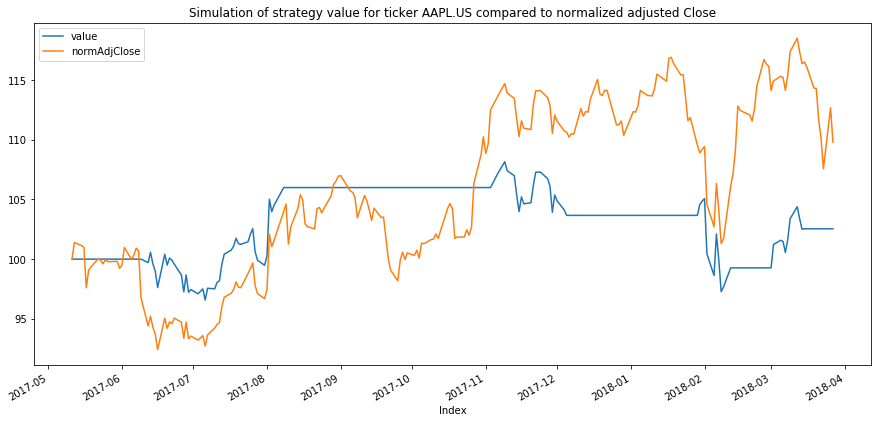

calculating backtest for: INTC.US


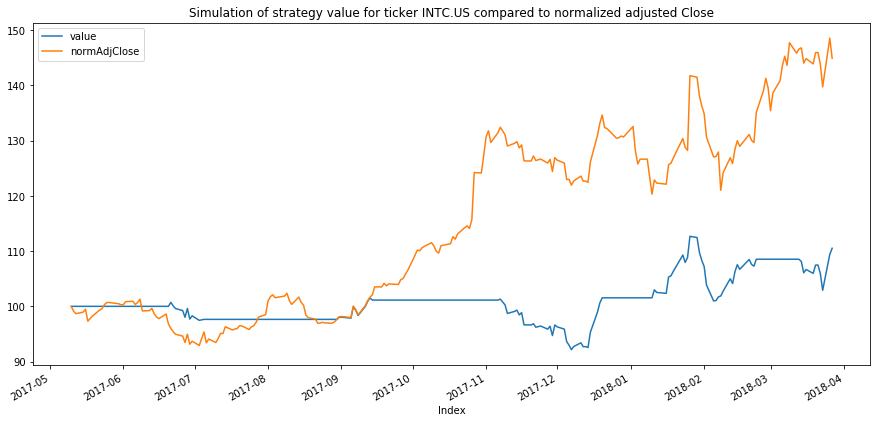

In [33]:
# cycle through all tickers and calculate performance of prediction for each
for ticker in tqdm_notebook(symbols):
    print('calculating backtest for: ' + ticker)
   
    # pull out all rows for current ticker 
    df_backtest_this_ticker = df_backtest.loc[df_backtest[ticker]==1, 
                                              [ticker, 'setup_for_profitable_trade', 'setup_for_profitable_trade_prediction']] 
    
    ##### 1) get the downloaded stock data for this ticker and for the dates that will be part of the backtest
       
    # pull out the data for current ticker
    df_downloaded_data_this_ticker = df_downloaded_all_tickers.loc[ df_downloaded_all_tickers['ticker']==ticker, :]
    # now ensure we only use the same dates as in the backtest for this ticker
    df_downloaded_data_this_ticker_backtest_dates = df_downloaded_data_this_ticker.loc[df_backtest_this_ticker.index, :]
    
    # ensure same dates in index
    assert (df_backtest_this_ticker.index == df_downloaded_data_this_ticker_backtest_dates.index).all
    # ensure we got the right rows from the downloaded data for this stock
    assert (ticker == df_downloaded_data_this_ticker_backtest_dates['ticker']).all
    
    # now that we know we have the right data, keep only most important columns
    df_downloaded_data_this_ticker_backtest_dates = df_downloaded_data_this_ticker_backtest_dates[['AdjOpen', 'AdjClose', 
                                                                                                  'AdjHigh', 'AdjLow', 'ticker']]
    
    # build dataframe that has downloaded data and prediction and true strategy result for backtest time period
    df_backtest_this_ticker_with_downloaded_data = df_backtest_this_ticker.join(df_downloaded_data_this_ticker_backtest_dates)
    
    ###### we now have the dataframe with the original stock price data and a prediction column

    backtest_df = df_backtest_this_ticker_with_downloaded_data
    backtest_df = calculate_backtest(backtest_df, 'setup_for_profitable_trade_prediction', 
                                     buy_on_day_plus_x = 1,
                                     sell_on_day_plus_x = 10,
                                     verbose=False)
    show_chart_of_backtest_result(backtest_df)
    
    

## use TPOT